In [1]:
# wip

# CB Insights Global Unicorn Club 2019
https://www.cbinsights.com/research-unicorn-companies
Full list - 500 Companies.

In [2]:
# V 1.14
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, PanTool
from bokeh.models.widgets import Slider, Select, TextInput, Div
from bokeh.models import WheelZoomTool, SaveTool, LassoSelectTool
from bokeh.io import curdoc
from functools import lru_cache
import bokeh

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 12,
#     'figure.figsize': (12, 6),
    'figure.figsize': (16, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
})

Loading BokehJS ...

In [3]:
# Used Versions
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Bokeh', bokeh.__version__)
# print('TextBlob', textblob.__version__)

Pandas: 1.1.5
Numpy: 1.18.4
Matplotlib 3.3.3
Seaborn 0.11.0
Bokeh 2.2.3


In [4]:
df = pd.read_excel(
    'data/CB-Insights_Global-Unicorn-Club_2019.xlsx', 
    skiprows=2,
    header=0,
)

df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['company', 'valuation', 'country', 'category', 'investors']
df.head(2)

,company,valuation,country,category,investors
0,Bytedance,140.00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,62.00,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."


In [5]:
df['valuation'] = pd.to_numeric(df['valuation'])
# df['valuation'] = df['valuation'].astype(int)

# Countries

In [6]:
print('Number of startups by Country ($B)')
df.groupby('country').company.count().sort_values(ascending=False)

Number of startups by Country ($B)


country
United States           243
China                   118
India                    25
United Kingdom           24
Germany                  12
South Korea              11
Israel                    8
France                    7
Brazil                    7
Indonesia                 5
Hong Kong                 4
Japan                     4
Netherlands               3
Singapore                 3
Sweden                    3
Switzerland               3
Colombia                  2
Canada                    2
South Africa              2
Spain                     2
United Arab Emirates      2
Australia                 2
Estonia                   1
Croatia                   1
Uruguay                   1
Ireland                   1
Luxembourg                1
Mexico                    1
Philippines               1
Portugal                  1
Lithuania                 1
Name: company, dtype: int64

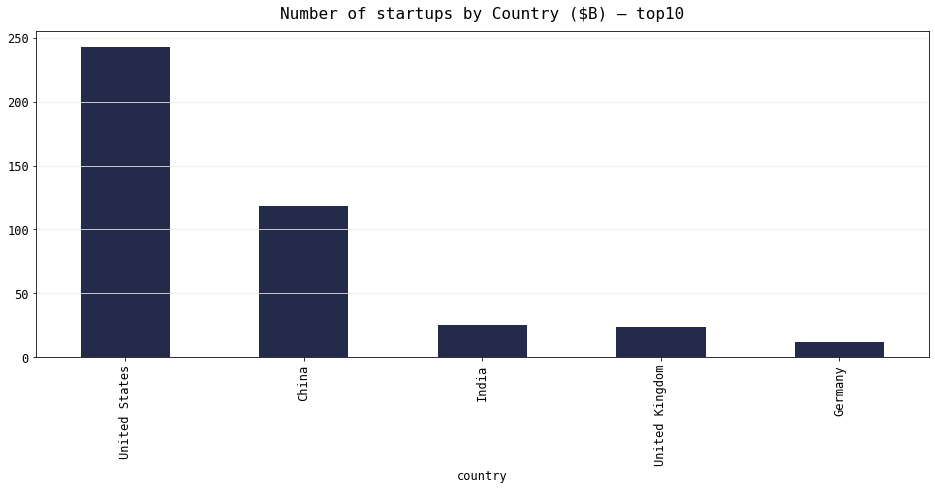

In [7]:
top_cap = 10
df.groupby('country').company.count().sort_values(ascending=False)[:5].plot(kind='bar', color=MC)

plt.title(f'Number of startups by Country ($B) — top{top_cap}', y=1.02);
plt.grid(axis='y')

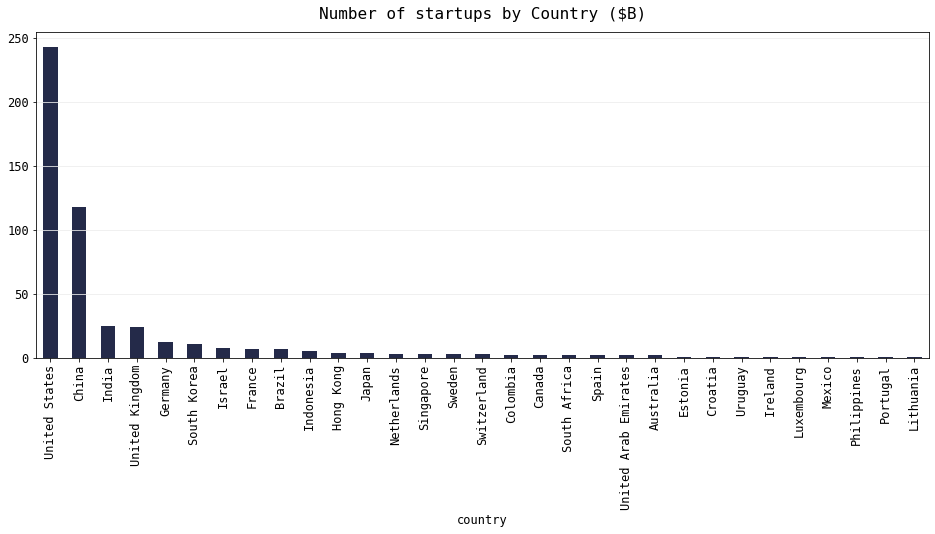

In [8]:
df.groupby('country').company.count().sort_values(ascending=False).plot(kind='bar', color=MC)

plt.title('Number of startups by Country ($B)', y=1.02);
plt.grid(axis='y')

In [9]:
print('Cumulative valuation by Country ($B)')
df.groupby('country').valuation.sum().sort_values(ascending=False)

Cumulative valuation by Country ($B)


country
United States          717.90
China                  516.80
India                   87.76
United Kingdom          65.49
South Korea             30.38
Indonesia               26.40
Germany                 24.92
Singapore               19.10
Brazil                  18.00
Sweden                  16.20
Israel                  10.75
France                   9.21
Australia                7.80
Hong Kong                5.85
Japan                    5.20
Netherlands              5.00
Colombia                 4.65
United Arab Emirates     3.50
Switzerland              3.00
Canada                   2.60
South Africa             2.58
Spain                    2.40
Estonia                  1.90
Uruguay                  1.20
Ireland                  1.20
Mexico                   1.15
Lithuania                1.12
Croatia                  1.00
Luxembourg               1.00
Philippines              1.00
Portugal                 1.00
Name: valuation, dtype: float64

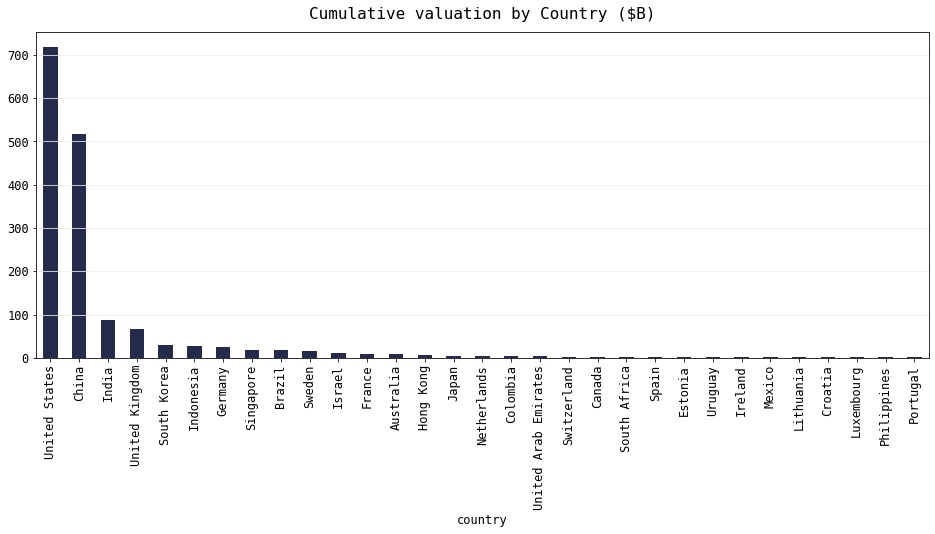

In [10]:
df.groupby('country').valuation.sum().sort_values(ascending=False).plot(kind='bar', color=MC)
plt.title('Cumulative valuation by Country ($B)', y=1.02);
plt.grid(axis='y')

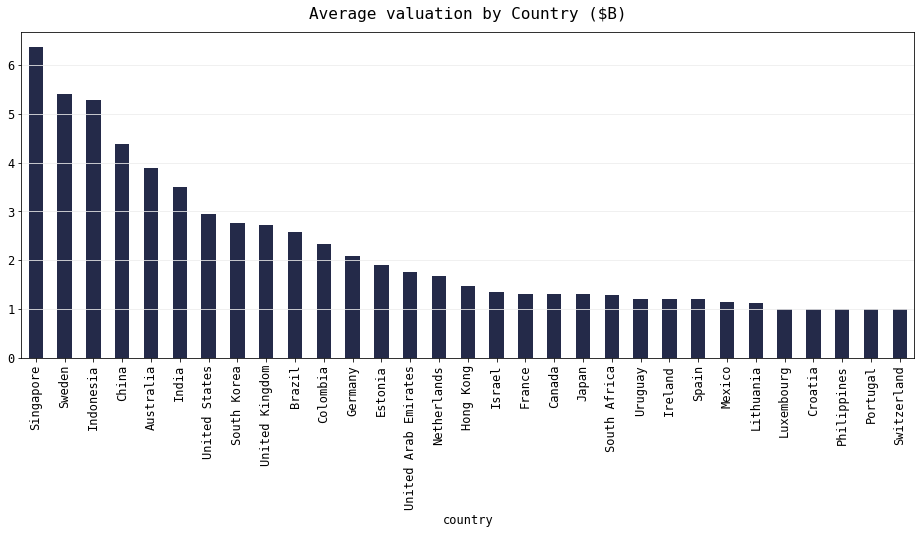

In [11]:
df.groupby('country').valuation.mean().sort_values(ascending=False).plot(kind='bar', color=MC)
plt.title('Average valuation by Country ($B)', y=1.02);
plt.grid(axis='y')

# VC

In [12]:
def investors_clean(row):
    if row == 'NaN':
        print('nan')
    try:
        row.strip()
        row = row.split(',')
        if row:
            return [el.strip() for el in row]
        else:
            return np.nan
    except:
        return np.nan

df.investors = df.investors.apply(investors_clean)

df_investors = df.explode('investors')

In [13]:
top_cap = 50
print(f'Cumulative valuation by Investor ($B) - top{top_cap}')
df_investors.groupby('investors').valuation.sum().sort_values(ascending=False)[:top_cap]

Cumulative valuation by Investor ($B) - top50


investors
Sequoia Capital China              225.28
Softbank Group                     189.45
Sina Weibo                         143.00
SIG Asia Investments               140.00
Sequoia Capital                    125.16
Tiger Global Management            112.88
Khosla Ventures                     97.17
Andreessen Horowitz                 87.90
Tencent Holdings                    84.08
Founders Fund                       82.56
Matrix Partners                     73.20
IDG Capital                         63.68
Softbank Corp.                      63.00
                                    62.00
capitalG                            58.25
SoftBank Group                      56.64
Alibaba Group                       54.15
New Enterprise Associates           47.28
Rothenberg Ventures                 46.00
Draper Fisher Jurvetson             46.00
Accel                               45.94
Kleiner Perkins Caufield & Byers    41.85
GGV Capital                         41.15
Google Ventures         

In [14]:
# droping nan's
df_investors = df_investors[df_investors.investors != '']

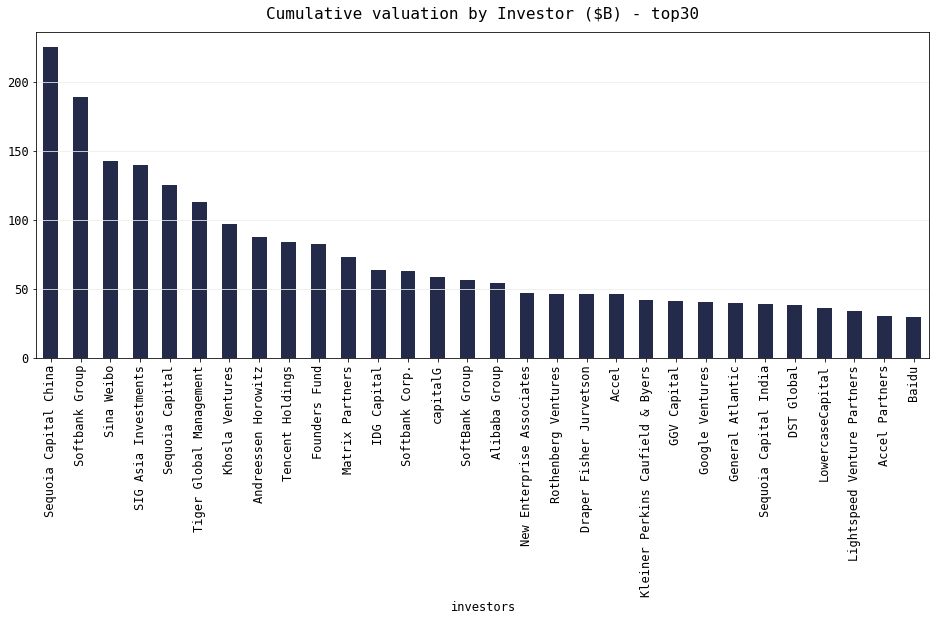

In [15]:
df_investors.groupby('investors').valuation.sum().sort_values(ascending=False)[:30].plot(kind='bar', color=MC)
plt.title('Cumulative valuation by Investor ($B) - top30', y=1.02);
plt.grid(axis='y')

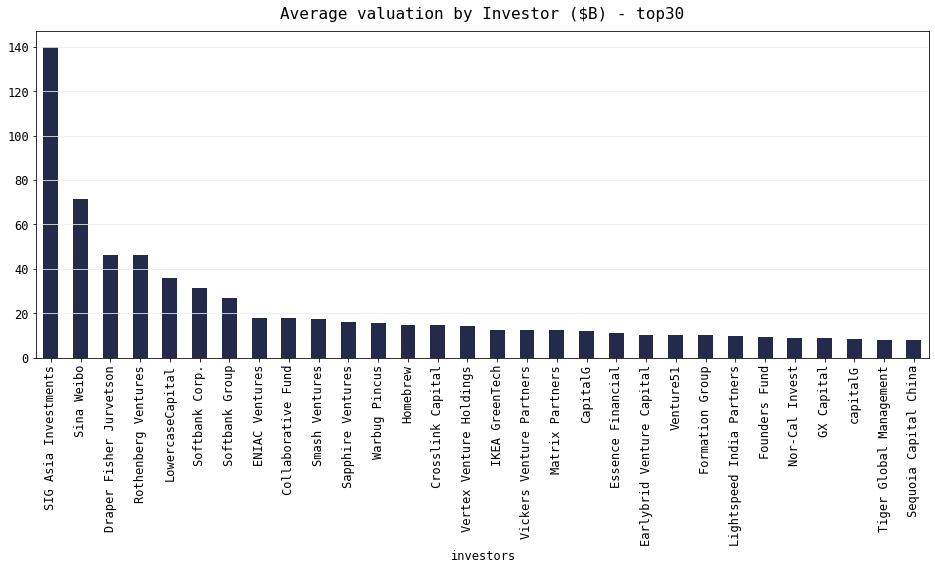

In [16]:
df_investors.groupby('investors').valuation.mean().sort_values(ascending=False)[:30].plot(kind='bar', color=MC)
plt.title('Average valuation by Investor ($B) - top30', y=1.02);
plt.grid(axis='y')

# Categories

In [17]:
print('Number of startups by Category ($B)')
df.groupby('category').company.count().sort_values(ascending=False)

Number of startups by Category ($B)


category
Fintech                                71
Internet software & services           64
E-commerce & direct-to-consumer        64
Artificial intelligence                45
Mobile & telecommunications            33
Other                                  32
Health                                 31
Supply chain, logistics, & delivery    28
Auto & transportation                  28
Hardware                               20
Edtech                                 19
Data management & analytics            18
Cybersecurity                          17
Consumer & retail                      17
Travel                                 13
Education                               1
Name: company, dtype: int64

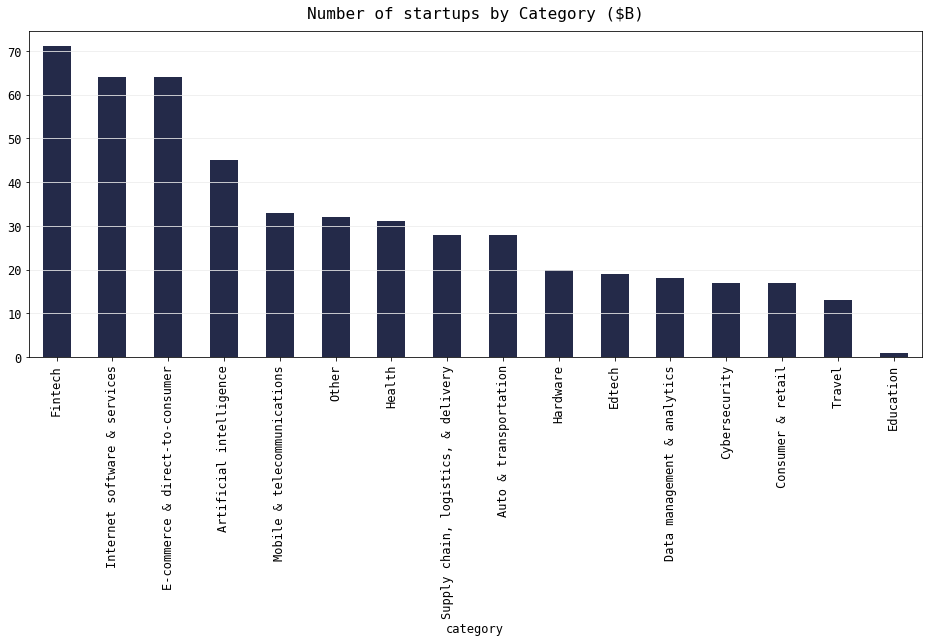

In [18]:
df.groupby('category').company.count().sort_values(ascending=False).plot(kind='bar', color=MC)

plt.title('Number of startups by Category ($B)', y=1.02);
plt.grid(axis='y')

In [19]:
print(f'Cumulative valuation by Category ($B)')
df.groupby('category').valuation.sum().sort_values(ascending=False)

Cumulative valuation by Category ($B)


category
Fintech                               249.43
Artificial intelligence               242.39
E-commerce & direct-to-consumer       171.75
Auto & transportation                 137.63
Internet software & services          131.05
Other                                 114.40
Supply chain, logistics, & delivery    97.06
Hardware                               80.50
Health                                 80.31
Mobile & telecommunications            75.00
Edtech                                 55.68
Travel                                 45.08
Consumer & retail                      42.15
Cybersecurity                          35.78
Data management & analytics            35.45
Education                               2.40
Name: valuation, dtype: float64

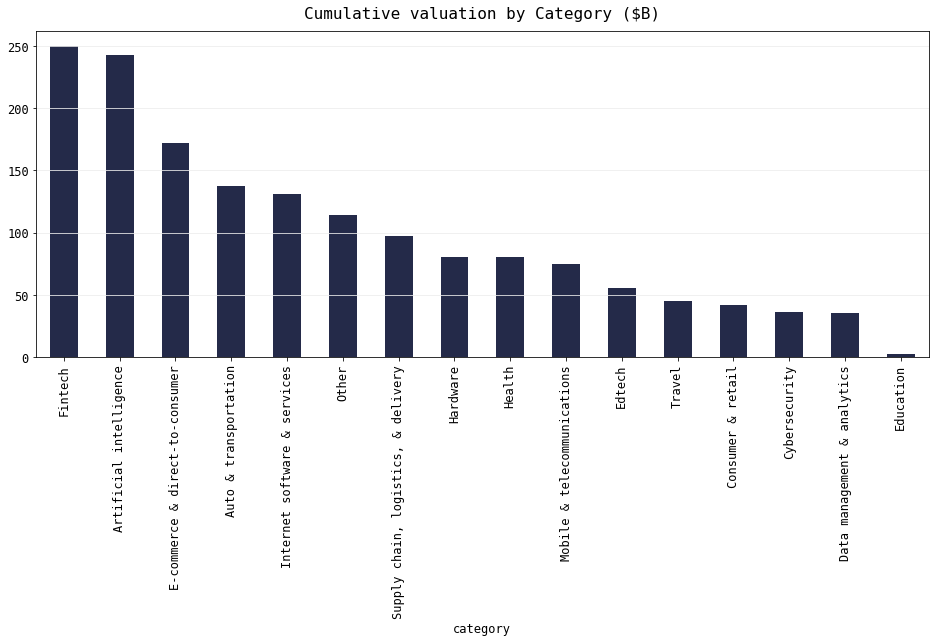

In [20]:
top_cap = 50
df.groupby('category').valuation.sum().sort_values(ascending=False)[:].plot(kind='bar', color=MC)
plt.title(f'Cumulative valuation by Category ($B)', y=1.02);
plt.grid(axis='y')

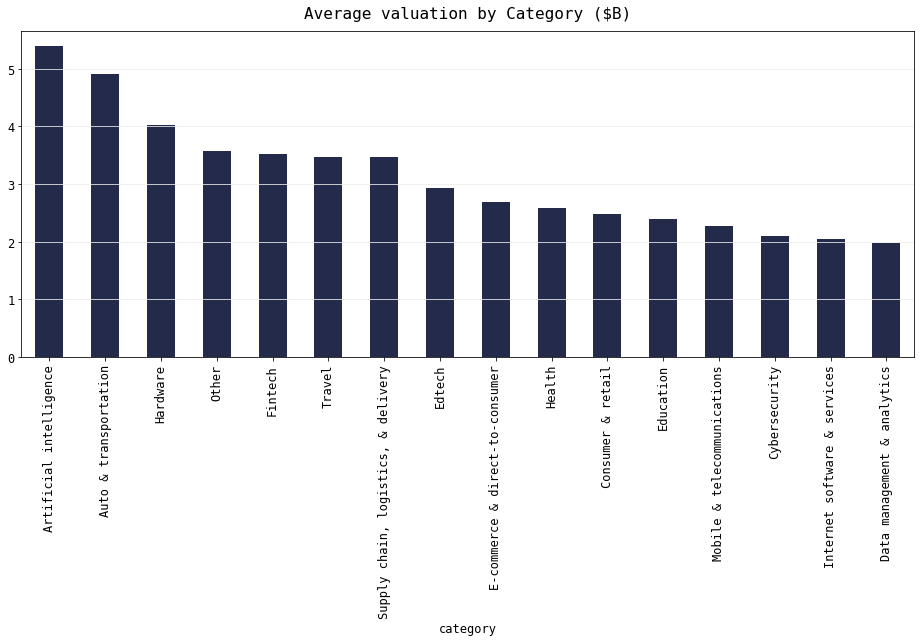

In [21]:
top_cap = 50
df.groupby('category').valuation.mean().sort_values(ascending=False)[:top_cap].plot(kind='bar', color=MC)
plt.title(f'Average valuation by Category ($B)', y=1.02);
plt.grid(axis='y')